<a href="https://colab.research.google.com/github/snvssk/data298A/blob/development/SolarEnergy/MLModels/ANN-3datapoints-12-8-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df= pd.read_csv('/content/drive/MyDrive/all_cities_transformed_combined.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,0.0,93.63,165.41,0.100,1024.0,1.700,294.0,0.7,117987.0
1,1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,0.0,93.63,165.11,0.100,1024.0,1.700,307.0,0.7,117987.0
2,2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,0.0,93.38,162.29,0.100,1024.0,1.700,321.0,0.7,117987.0
3,3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,0.0,94.00,157.91,0.100,1024.0,1.800,332.0,0.7,117987.0
4,4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,0.0,93.32,152.72,0.100,1024.0,1.800,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946181,946181,2013.0,12.0,31.0,21.0,30.0,6.0,1.0,0.0,0.0,74.05,142.58,0.113,1020.0,0.950,174.5,0.6,117546.0
946182,946182,2013.0,12.0,31.0,22.0,0.0,6.0,1.0,0.0,0.0,74.40,148.35,0.113,1020.0,0.977,152.1,0.9,117546.0
946183,946183,2013.0,12.0,31.0,22.0,30.0,5.0,0.0,0.0,0.0,79.80,153.89,0.113,1020.0,0.972,152.1,1.1,117546.0
946184,946184,2013.0,12.0,31.0,23.0,0.0,4.0,0.0,0.0,0.0,80.32,158.95,0.113,1020.0,0.968,166.7,1.3,117546.0


In [3]:
# nsrdb_na = df.drop(columns='Unnamed: 0')
nsrdb_na = df.copy()
#null_rows = nsrdb_na[nsrdb_na.isna().any(axis=1)]
#null_rows
nsrdb_na.isnull().sum()
#nsrdb_na.columns
#nsrdb_na['GHI'].isnull().values.sum()
nsrdb = nsrdb_na.dropna()
#print(nsrdb)
nsrdb.isnull().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [6]:
"""from datetime import datetime
nsrdb['Date'] = nsrdb.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)
nsrdb['Date'] = pd.to_datetime(nsrdb['Date'])
nsrdb.info()
nsrdb = nsrdb.resample('D', on='Date').mean()
#nsrdb.drop(['Hour'],	['Minute'], axis=1)
nsrdb"""

'from datetime import datetime\nnsrdb[\'Date\'] = nsrdb.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", \'%Y-%m-%d\'), axis=1)\nnsrdb[\'Date\'] = pd.to_datetime(nsrdb[\'Date\'])\nnsrdb.info()\nnsrdb = nsrdb.resample(\'D\', on=\'Date\').mean()\n#nsrdb.drop([\'Hour\'],\t[\'Minute\'], axis=1)\nnsrdb'

In [4]:
nsrdb = nsrdb.loc[(nsrdb['Hour'].isin([12,8,16])) & (nsrdb['Minute'] == 0)]
nsrdb= nsrdb.drop(['Unnamed: 0'], axis=1)
nsrdb

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
16,2018.0,1.0,1.0,8.0,0.0,10.7,4.0,9.0,46.0,88.99,84.37,0.100,1025.0,1.800,347.0,0.7,117987.0
24,2018.0,1.0,1.0,12.0,0.0,16.8,7.0,8.9,430.0,59.51,60.35,0.100,1025.0,1.800,25.0,1.1,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,114.0,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
64,2018.0,1.0,2.0,8.0,0.0,12.2,6.0,8.2,33.0,76.49,84.38,0.100,1024.0,1.800,89.0,1.1,117987.0
72,2018.0,1.0,2.0,12.0,0.0,18.5,6.0,8.4,135.0,51.75,60.26,0.100,1023.0,2.000,58.0,1.2,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946114,2013.0,12.0,30.0,12.0,0.0,18.0,0.0,2.0,518.0,39.99,60.49,0.111,1020.0,0.831,182.5,1.2,117546.0
946122,2013.0,12.0,30.0,16.0,0.0,14.0,7.0,6.0,63.0,70.37,80.93,0.111,1020.0,0.994,266.4,1.0,117546.0
946154,2013.0,12.0,31.0,8.0,0.0,10.0,4.0,8.0,36.0,98.80,84.43,0.111,1020.0,1.310,234.9,0.3,117546.0
946162,2013.0,12.0,31.0,12.0,0.0,16.0,0.0,5.0,506.0,51.64,60.42,0.111,1020.0,1.344,49.9,1.2,117546.0


In [5]:
target = nsrdb['GHI']#keeping only target(ghi) data here
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
16,2018.0,1.0,1.0,8.0,0.0,10.7,4.0,9.0,88.99,84.37,0.100,1025.0,1.800,347.0,0.7,117987.0
24,2018.0,1.0,1.0,12.0,0.0,16.8,7.0,8.9,59.51,60.35,0.100,1025.0,1.800,25.0,1.1,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
64,2018.0,1.0,2.0,8.0,0.0,12.2,6.0,8.2,76.49,84.38,0.100,1024.0,1.800,89.0,1.1,117987.0
72,2018.0,1.0,2.0,12.0,0.0,18.5,6.0,8.4,51.75,60.26,0.100,1023.0,2.000,58.0,1.2,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946114,2013.0,12.0,30.0,12.0,0.0,18.0,0.0,2.0,39.99,60.49,0.111,1020.0,0.831,182.5,1.2,117546.0
946122,2013.0,12.0,30.0,16.0,0.0,14.0,7.0,6.0,70.37,80.93,0.111,1020.0,0.994,266.4,1.0,117546.0
946154,2013.0,12.0,31.0,8.0,0.0,10.0,4.0,8.0,98.80,84.43,0.111,1020.0,1.310,234.9,0.3,117546.0
946162,2013.0,12.0,31.0,12.0,0.0,16.0,0.0,5.0,51.64,60.42,0.111,1020.0,1.344,49.9,1.2,117546.0


In [6]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [11]:
x_train

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
760190,2016.0,5.0,21.0,12.0,0.0,15.0,4.0,8.0,68.85,16.88,0.122,1010.0,2.005,249.8,3.2,116662.0
542052,2017.0,12.0,8.0,12.0,0.0,17.0,1.0,0.0,33.19,60.04,0.098,1010.0,0.440,36.6,2.4,116661.0
245146,2014.0,12.0,28.0,16.0,0.0,10.0,0.0,7.0,90.19,81.28,0.120,1020.0,1.209,320.1,0.8,117549.0
591402,2010.0,10.0,2.0,12.0,0.0,24.0,0.0,9.0,40.44,41.02,0.112,1000.0,3.348,230.4,2.8,116661.0
82312,2010.0,9.0,12.0,16.0,0.0,22.0,0.0,9.0,52.44,63.16,0.114,1010.0,1.630,250.7,3.5,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869594,2015.0,8.0,18.0,12.0,0.0,28.0,0.0,12.0,40.57,24.47,0.124,1010.0,1.958,243.5,3.7,117546.0
610604,2011.0,11.0,6.0,12.0,0.0,13.0,3.0,6.0,63.44,53.34,0.107,1000.0,1.435,311.4,2.4,116661.0
13760,2018.0,10.0,14.0,16.0,0.0,24.1,0.0,1.1,22.14,73.26,0.100,1016.0,0.600,353.0,2.1,117987.0
252764,2010.0,6.0,5.0,8.0,0.0,22.0,0.0,14.0,68.64,54.35,0.132,1020.0,3.920,298.8,1.8,117549.0


In [8]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (41391, 16)
x_test shape (17739, 16)
y_train shape (41391,)
y_text shape (17739,)


# https://github.com/tpt5cu/solarIrradiancePredictor/blob/master/Neural_Net.ipynb

In [9]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [10]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Normalization(axis=None))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

In [11]:
#Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae',keras.metrics.RootMeanSquaredError()])

In [12]:
history = model.fit(x_train, y_train, epochs=100)#, batch_size=64)

Epoch 1/100
1294/1294 [==============================] - 10s 7ms/step - loss: 12261.2979 - mae: 63.4982 - root_mean_squared_error: 110.7307
Epoch 2/100
1294/1294 [==============================] - 10s 8ms/step - loss: 4112.7935 - mae: 41.2419 - root_mean_squared_error: 64.1311
Epoch 3/100
1294/1294 [==============================] - 11s 9ms/step - loss: 3598.1042 - mae: 37.0495 - root_mean_squared_error: 59.9842
Epoch 4/100
1294/1294 [==============================] - 10s 8ms/step - loss: 3406.4260 - mae: 35.2656 - root_mean_squared_error: 58.3646
Epoch 5/100
1294/1294 [==============================] - 9s 7ms/step - loss: 3310.7283 - mae: 34.9009 - root_mean_squared_error: 57.5389
Epoch 6/100
1294/1294 [==============================] - 9s 7ms/step - loss: 3206.9592 - mae: 34.0442 - root_mean_squared_error: 56.6300
Epoch 7/100
1294/1294 [==============================] - 10s 7ms/step - loss: 3130.9695 - mae: 33.4677 - root_mean_squared_error: 55.9551
Epoch 8/100
1294/1294 [===========

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Delete saved model before saving another time

In [ ]:
rm -rf '/content/drive/MyDrive/my_model'

In [ ]:
model.save('/content/drive/MyDrive/my_model')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               4500      
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 91,151
Trainable params: 91,151
Non-traina

## Training MAE 10.50 w/m2, RMSE 26.05 w/m2 after 100 epoch

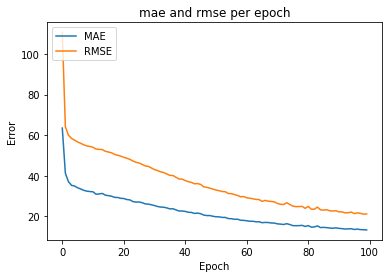

In [13]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('mae and rmse per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [14]:
y_pred=model.predict(x_test)
y_pred

555/555 [==============================] - 2s 4ms/step


array([[179.0361 ],
       [474.23608],
       [430.0684 ],
       ...,
       [444.1152 ],
       [477.8477 ],
       [982.11914]], dtype=float32)

In [15]:
from sklearn.metrics import r2_score 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.9688489058660076


## R2 of 99% explains all the features we have in our dataset contributing towards to predict GHI. 

In [16]:
from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model MAE 25.27297675398575
Model MSE 2623.5762492637946
Model RMSE 51.22085756080031


# Test

## Cupertino

In [17]:
import pandas as pd
df =pd.read_csv('/content/cupertino_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 119.07023488162315
Model MSE 19427.746491734946
Model RMSE 139.38345128362602


## FosterCity

In [18]:
import pandas as pd
df =pd.read_csv('/content/fostercity_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 120.84689979435646
Model MSE 20529.706488351098
Model RMSE 143.28191263502555


## Los Gatos

In [20]:
import pandas as pd
df =pd.read_csv('/content/losgatos_test.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 4ms/step
Model MAE 120.05568572397101
Model MSE 19810.76670041938
Model RMSE 140.75072539926526


## Saratoga

In [22]:
import pandas as pd
df =pd.read_csv('/content/saratoga_2020.csv')
df
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
#df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

58/58 [==============================] - 0s 3ms/step
Model MAE 125.96483707715387
Model MSE 20748.392663252704
Model RMSE 144.0430236535345
